# Disciplina: Introdução ao Reconhecimento de Padrões
## Prática - kNN em Python

In [2]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1 - Carregando o dataset em um dataframe

In [3]:
df_iris = pd.read_csv('Downloads/Iris.csv')
df_iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Criar um array com as características

Usando somente duas característica para teste.

In [5]:
X = df_iris[['PetalLengthCm', 'PetalWidthCm']].values
print(X.shape)

(150, 2)


In [6]:
X[:5, :]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

### Criar um array contendo os rótulos das classes presentes no dataset 

Porém, antes é necessário criar os rótulos para as classes. As classes nesse dataset são as diferentes espécies do gênero Iris

In [7]:
# criar um dicionário para as classes
label_dict = {'Iris-setosa': 0,
             'Iris-versicolor': 1,
             'Iris-virginica': 2}

# criar uma nova coluna no dataset para mapear as classes pelas strings do dicionário
df_iris['ClassLabel'] = df_iris['Species'].map(label_dict)

In [8]:
df_iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,ClassLabel
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


In [9]:
# criando o array contendo os rótulos criados
y = df_iris['ClassLabel'].values
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

O próximo passo é dividir o dataset em treino e teste. Porém, antes será necessário "embaralhar" os dados uma vez que os rótulos das classes estão todos agrupados (50 zeros, 50 1's e 50 2's). Isso seria um problema, por exemplo, ao definir os 100 primeiros valores como treino e os 50 últimos valores para teste, o que enviesaria totalmente os resultados.

### Embaralhar os dados e criar conjuntos de treino e teste

In [10]:
# Criar um array de indices
indices = np.arange(y.shape[0])
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

O próximo passo é embaralhar esses indices. É necessário definir um seed para que o resultado possa ser reproduzido e os valores sejam exatamente os mesmos.

In [11]:
rnd = np.random.RandomState(123)
shuffled_indices = rnd.permutation(indices)
shuffled_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

Agora é possível utilizar esses indices embaralhados para embaralhar tanto o X quanto o y. Isso é feito conjuntamente para preservar a correspondecia entre características e rótulos

In [12]:
# embaralhando os dados
X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]

In [13]:
# agora sim, dividir o dataset em subconjuntos de treino e teste
X_train, y_train = X_shuffled[:105], y_shuffled[:105]
X_test, y_test = X_shuffled[105:], y_shuffled[105:]

### Usando o Scikit-Learn

Todos os passos realizados até aqui podem ser executados de forma mais rápida e automática com funções implementadas Scikit-Learn. O objetivo de fazer manualmente é apenas por motivo de entendimento do procedimento. Os passos a seguir executam os mesmos passos de forma mais rápida e econômica em termos de códigos. A biblioteca inclusive já contém o dataset Iris para ser importado.

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data[:, 2:], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 2)
(105,)
(45, 2)
(45,)


### Visualizar os dados em gráficos

Passo fundamental em qualquer trabalho de análise de dados

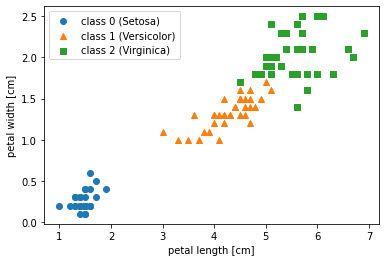

In [16]:
# plotar os dados de treino
plt.scatter(X_train[y_train == 0, 0],
           X_train[y_train == 0, 1],
           marker = 'o',
           label = 'class 0 (Setosa)')

plt.scatter(X_train[y_train == 1, 0],
           X_train[y_train == 1, 1],
           marker = '^',
           label = 'class 1 (Versicolor)')

plt.scatter(X_train[y_train == 2, 0],
           X_train[y_train == 2, 1],
           marker = 's',
           label = 'class 2 (Virginica)')

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')

plt.show()

Pode-se observar que a relação entre comprimento e largura de pétalas parece ser um bom classificador para as espécies (classes) da planta Iris. O próximo passo é aplicar o modelo classificador kNN para criar o algoritimo de aprendizado.

### Aplicar o modelo k-Nearest Neighbor

Nesse passo, aplica-se o algoritimo classificador kNN presente na biblioteca Scikit-Learn para criar um objeto do tipo kNN que será aplicado no dataset de treino.

In [17]:
# importando o classificador e criando o objeto kNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Fazer predições utilizando o modelo kNN

Após aplicar o classificador aos dados, podemos fazer predições para dados não "vistos" pelo modelo. Esses dados, são o conjunto de teste.

In [18]:
# fazendo predições
y_pred = knn_model.predict(X_test)

In [19]:
# avaliando o quão bom o modelo é para prever a classificação das classes de flores
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print('Test set accuracy: %.2f%%' % accuracy)

Test set accuracy: 95.56%


### Visualizar a superfífice de decisão

Nessa atividade o modelo foi bastante simplificado - apenas duas variáveis - por motivos de didática. É comum que datasets possuam mais do que duas. Nesse estudo, ao utilizar somente duas variáveis, o visualização da superfície de decisão fica fácil.

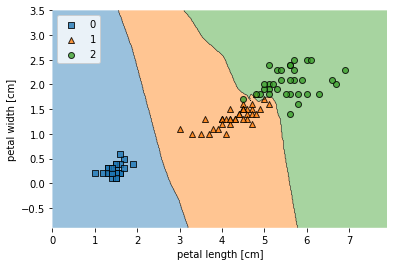

In [20]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

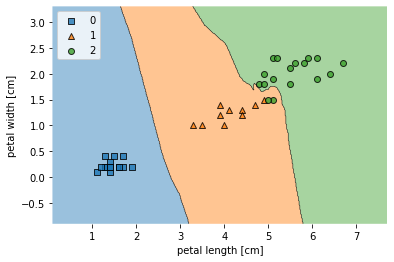

In [21]:
plot_decision_regions(X_test, y_test, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()